#  **Project: Capstone Project 1 – (Apply Inferential Statistics section 8.4)**

**Project name: -** Explanatory Analysis of Traffic pullover pattern for Florida v/s Vermont

**Student Name: -** Jitendra Agarwal 

**Course: -** Springboard cohort Jan2 2018
  
**Data set Source: -** https://openpolicing.stanford.edu/data/ 

**Data provider: -** Openpolicing project by Stanford


## **About the DATA**
The Raw data for this project contains the traffic stop data collected for 30+ states for open police project by Stanford research team. Standardized stop data are available to download (by state) from the link above provided by Stanford.
The csv includes a subset of common fields for each state and indicates whether data are available for at least 70% of records in that state. Some states have more fields.
The original, unprocessed data we collected contain even more information.
The Stanford Open Policing Project data are made available under the Open Data Commons Attribution License.

Downloaded excel sheet of raw data for VT: -
https://github.com/jiagarwa/capstone-project1-Jitendra

file name: - ‘VT-clean.csv.gz’

### **Accessing and filtering the Data**

1. **Read data **

    Read Data from csv file VT-clean.csv and Show the all columns of data and their data type.

In [217]:
#Import Pandas and read csv into a DataFrame

import pandas as pd

def filter_csv_to_df(filename, year, chunk):
    
    df_new=pd.DataFrame()

    if chunk <= 10000 or chunk >= 100000000:
        chunk = 10 ** 8

    if year == '' :
        year = 2015
        
    for data in pd.read_csv(filename, chunksize=chunk, low_memory=False):
        df = pd.DataFrame(data)
        df_new = pd.concat([df_new, df], axis=0)
        
        if year == 0:
            filter_df = df_new
        else:
            filter_df = df_new.loc[pd.to_datetime(df_new['stop_date']).dt.year == year]
            
    return filter_df


2. **Filter data for Year 2015: -**

    Convert data into a data frame and filter based on year from stop_date column and save in a separate file Filter data by year 2015. Call it VT_2015.csv

In [218]:
#df_FL_2015.to_csv('../data/FL_2015.csv')

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()

#Filter 2014 and 2015 Traffic data based on year in the stop_date column

df_VT_2014 = filter_csv_to_df('../data/VT-clean.csv', 2014, 100000000)
df_VT_2015 = filter_csv_to_df('../data/VT-clean.csv', 2015, 100000000)

#df_FL_2015 = filter_csv_to_df('../data/FL-clean.csv', 2015, 100000000)
#df_FL_2015.info()

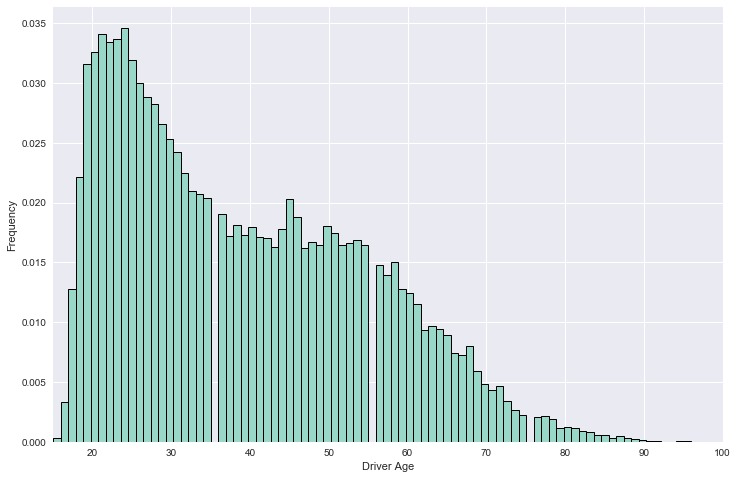

In [219]:
# add couple of new calculcated column to the original Data Frame
df_VT_2015.is_copy = False
df_VT_2015['hour'] = pd.to_datetime(df_VT_2015['stop_time']).dt.hour
df_VT_2015['dayofweek'] = pd.to_datetime(df_VT_2015['stop_date']).dt.weekday_name
df_VT_2015.set_index(['hour', 'dayofweek'], append=True)


plt.figure(figsize=(12,8))
df_VT_2015['driver_age'].plot('hist', label = '', legend=False, normed=True, color='#99d8c9', edgecolor='black', linewidth=1, bins=85)
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
plt.xlim(15,100);
plt.show()


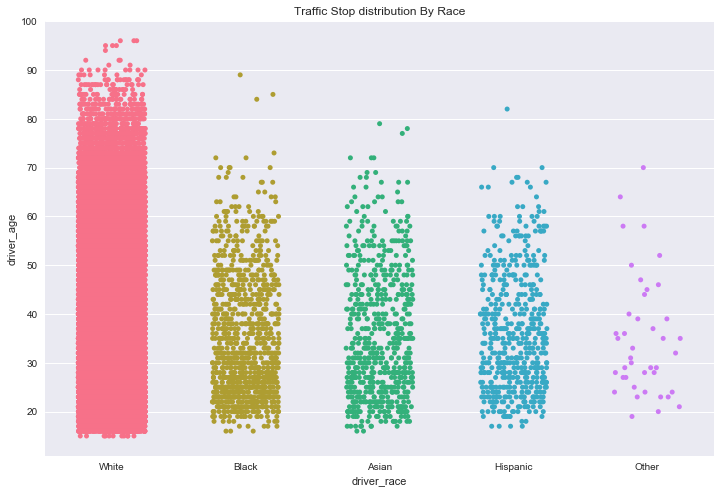

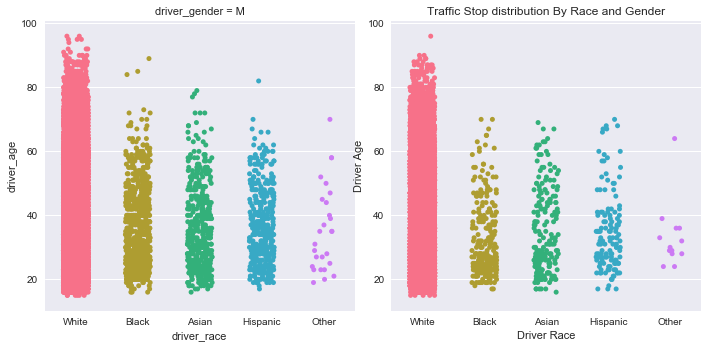

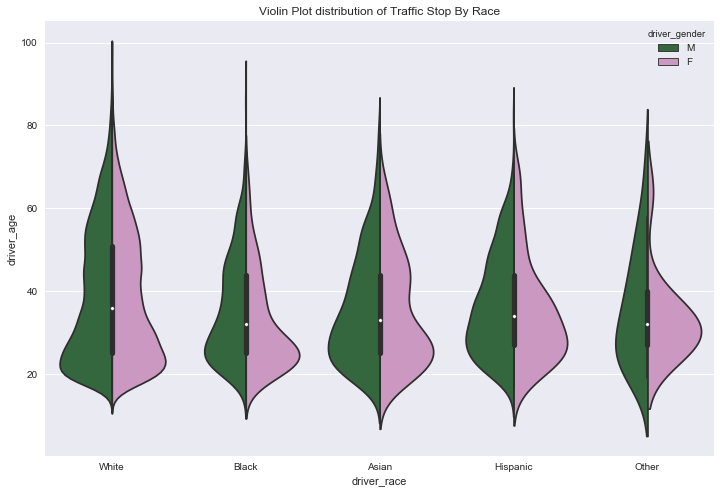

In [220]:

plt.figure(figsize=(12,8))
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Traffic Stop distribution By Race')
sns.stripplot(x="driver_race", y="driver_age", data=df_VT_2015, jitter=.25, palette="husl");
plt.show()

_ = plt.figure(figsize=(12,8))
sns.factorplot(x="driver_race", y="driver_age", col="driver_gender", data=df_VT_2015, kind="strip", jitter=.2, size=5, palette="husl");
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Traffic Stop distribution By Race and Gender')
plt.show()

plt.figure(figsize=(12,8))
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Violin Plot distribution of Traffic Stop By Race')
sns.violinplot(x="driver_race", y="driver_age", hue="driver_gender", data=df_VT_2015, split=True, palette="cubehelix");
plt.show()


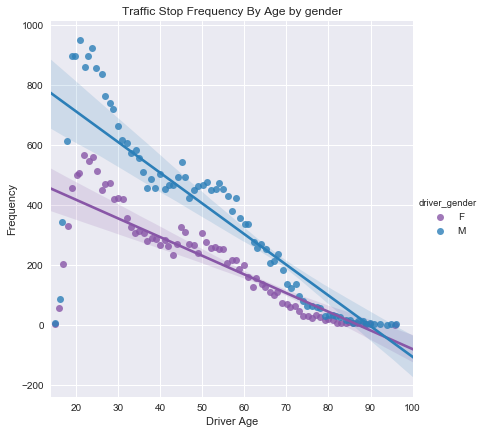

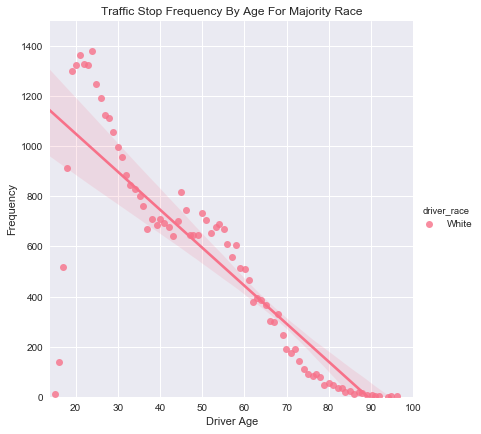

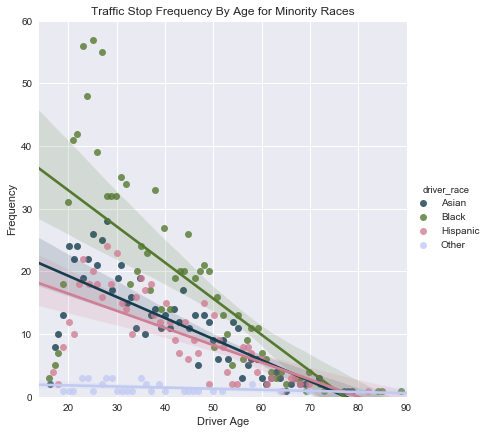

In [221]:
newdf2 = df_VT_2015.groupby(['driver_age','driver_gender']).id.count().reset_index()

sns.lmplot(x="driver_age", y="id", data=newdf2, hue='driver_gender', x_jitter=.2, size=6, palette=dict(M="#2c7fb8", F="#8856a7"));
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age by gender')
_ = plt.xlim(14,100)
plt.show()


newdf3 = df_VT_2015.groupby(['driver_age','driver_race']).id.count().reset_index()

sns.lmplot(x="driver_age", y="id", data=newdf3[newdf3.driver_race == 'White'], hue='driver_race', x_jitter=.2, size=6, palette='husl');
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age For Majority Race')
_ = plt.xlim(14,100)
_ = plt.ylim(0,1500)
plt.show()


sns.lmplot(x="driver_age", y="id", data=newdf3[newdf3.driver_race != 'White'], hue='driver_race', x_jitter=.2, size=6, palette='cubehelix');
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age for Minority Races')
_ = plt.xlim(14,90)
_ = plt.ylim(0,60)
plt.show()


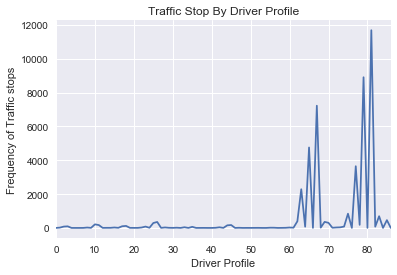

In [222]:
#Create a Dataframe of aggregated value by Driver Profile 

df_VT_2015_groups = df_VT_2015.groupby(['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested'], as_index=False).id.count().reset_index()
new_index= ['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested']
df_VT_2015_groups.reindex(new_index)

df_VT_2015_groups.sort_values(['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested'])
_ = plt.xlabel('Driver Profile')
_ = plt.ylabel('Frequency of Traffic stops')
_ = plt.title('Traffic Stop By Driver Profile')
df_VT_2015_groups.id.plot(kind='line')


In [223]:
#Get top 10 profile of Driver for Traffic stops.

VT_top_profile = pd.DataFrame(df_VT_2015_groups.nlargest(15, 'id'))
print(VT_top_profile)
print ('Highest Number of Total Traffic Stops for User Profile as:',
       np.around(VT_top_profile.loc[81]['id']/len(df_VT_2015.id)*100, decimals=2), '%')

print ( VT_top_profile.loc[81])

    index driver_race driver_gender         violation     stop_outcome  \
81     81       White             M  Moving violation  Written Warning   
79     79       White             M  Moving violation         Citation   
67     67       White             F  Moving violation  Written Warning   
65     65       White             F  Moving violation         Citation   
77     77       White             M         Equipment  Written Warning   
63     63       White             F         Equipment  Written Warning   
75     75       White             M         Equipment         Citation   
83     83       White             M             Other         Citation   
85     85       White             M             Other  Written Warning   
62     62       White             F         Equipment         Citation   
69     69       White             F             Other         Citation   
26     26       Black             M  Moving violation  Written Warning   
70     70       White             F   

###### Role of Race:-

We want to determine if race has any significant impat on the Traffic stop. The data must be divided into two groups based on race column, and we want to determine if the rate of Traffic stop is different between these two populations.

In [224]:
print ('Number of Total Traffic Stops :', len(df_VT_2015.id))
print ('Number of Traffic Stops for Minority Race:', len(df_VT_2015[df_VT_2015.driver_race!='White'].id))
print ('Number of callbacks for Majority Race:', len(df_VT_2015[df_VT_2015.driver_race=='White'].id))
print ('Number of Registrered drivers with Age 16 and older as of end of 2013 in vermont : 543057')

Number of Total Traffic Stops : 45662
Number of Traffic Stops for Minority Race: 3213
Number of callbacks for Majority Race: 42449
Number of Registrered drivers with Age 16 and older as of end of 2013 in vermont : 543057


we are goign to do a comparison between the two proportions of sample (White and Non White), and we will use a two-sample t test here.
According to the description for the collected data, the race values are assigned randomly to each resume, therefore we may consider the samples are independent.

The sample size of each group (divided based on race) is above 30, hence we are safe to consider that CLT holds.

In [225]:
data_racew = df_VT_2015[df_VT_2015.driver_race == 'White']
data_raceo = df_VT_2015[df_VT_2015.driver_race != 'White']

n_total = len(df_VT_2015)
p_w = np.count_nonzero(data_racew.id) / n_total
t_w = np.count_nonzero(data_racew[data_racew.stop_outcome == 'Citation'].id) / len(data_racew)
m_w = data_racew['driver_age'].median()

p_b = np.count_nonzero(data_raceo.id) / n_total
t_b = np.count_nonzero(data_raceo[data_raceo.stop_outcome == 'Citation'].id) / len(data_raceo)
m_b = data_raceo['driver_age'].median()

print(n_w, n_b)
print(t_w, t_b)
print(m_w, m_b)



44532 44532
0.37753539541567527 0.43075007780890134
36.0 35.0


In [226]:
data_25 = df_VT_2015[df_VT_2015.driver_age <= 25 ]
data_40 = df_VT_2015[df_VT_2015.driver_age > 25][df_VT_2015.driver_age <= 40]
data_60 = df_VT_2015[df_VT_2015.driver_age > 40][df_VT_2015.driver_age <= 60]
data_90 = df_VT_2015[df_VT_2015.driver_age > 60 ]

n_total = len(df_VT_2015)
p_25 = np.count_nonzero(data_25.id) / n_total
m_25 = data_25['driver_age'].median()
t_25 = np.count_nonzero(data_25[data_25.stop_outcome == 'Citation'].id) / len(data_25)

p_40 = np.count_nonzero(data_40.id) / n_total
m_40 = data_40['driver_age'].median()
t_40 = np.count_nonzero(data_40[data_40.stop_outcome == 'Citation'].id) / len(data_40)


p_60 = np.count_nonzero(data_60.id) / n_total
m_60 = data_60['driver_age'].median()
t_60 = np.count_nonzero(data_60[data_60.stop_outcome == 'Citation'].id) / len(data_60)


p_90 = np.count_nonzero(data_90.id) / n_total
m_90 = data_90['driver_age'].median()
t_90 = np.count_nonzero(data_90[data_90.stop_outcome == 'Citation'].id) / len(data_90)



print(p_25, p_40, p_60, p_90)
print(m_25, m_40, m_60, m_90)
print(t_25, t_40, t_60, t_90)


0.25469756033463276 0.31757259865971704 0.3083745784240725 0.10746353641978013
21.0 32.0 50.0 67.0
0.45116079105760964 0.4005241017860837 0.34173709253604145 0.27369064601589566


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
